This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

Did you experiment in Steps 1 and 2 using different parameter choices? If you did, you probably ran into some unexpected behavior. Did your solution ever blow up? (In my experience, CFD students *love* to make things blow up.)

You are probably wondering why changing the discretization parameters affects your solution in such a drastic way. This notebook discusses the CFL condition. And learn more by watching Prof. Barba's YouTube lectures (links below). 

Convergence and the CFL Condition
----
***

For the first few steps, we've been using the same general initial and boundary conditions. With the parameters we initially suggested, the grid has 41 points and the timestep is 0.025 seconds. Now, we're going to experiment with increasing the size of our grid. The code below is identical to the code we used in Step 1, but here it has been bundled up in a function so that we can easily examine what happens as we adjust just one variable: the grid size.

In [1]:
using Plots

function linearconv(nx)
    Δx = 2.0/(nx-1)
    x  = range(0, stop=Δx*(nx-1), length=nx)
    nt = 20
    Δt = 0.025
    t  = range(0, stop=Δt*nt, length=nt)
    c  = 1
    
    u₀ = ones(nx)
    u₀[0.5 .≤ x .≤ 1] .= 2
    
    
    uⁿ⁺¹ = similar(u₀)
    uⁿ⁺¹ .= u₀
    
    uⁿ = similar(u₀)
    
    for n in 1:nt
        uⁿ .= uⁿ⁺¹
        for i in 2:nx
            uⁿ⁺¹[i] = uⁿ[i] - c*Δt/Δx*(uⁿ[i] - uⁿ[i-1])
        end
    end
    
    plot(x,uⁿ⁺¹)
    
end

linearconv (generic function with 1 method)

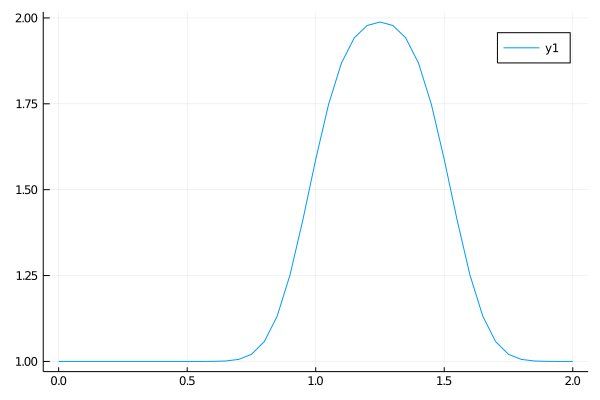

In [2]:
linearconv(41) #convection using 41 grid points

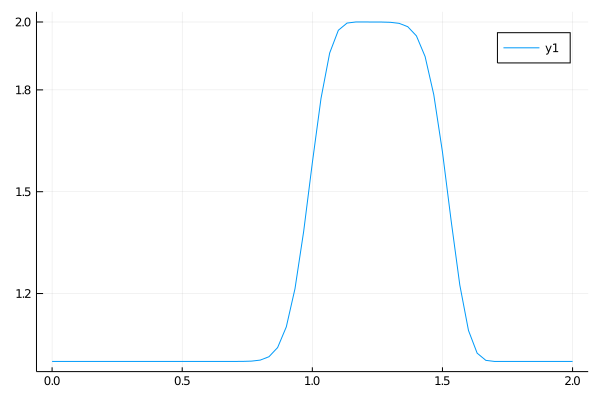

In [3]:
linearconv(61)

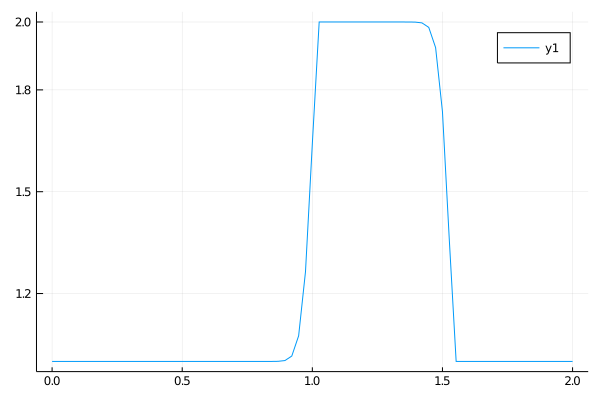

In [4]:
linearconv(77)

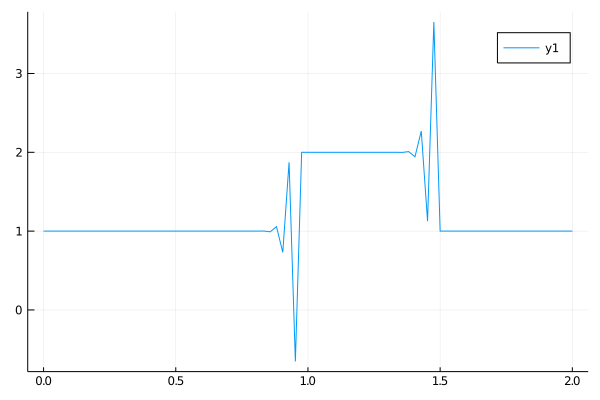

In [5]:
linearconv(85)

This doesn't look anything like our original hat function. 

### What happened?

To answer that question, we have to think a little bit about what we're actually implementing in code.  

In each iteration of our time loop, we use the existing data about our wave to estimate the speed of the wave in the subsequent time step.  Initially, the increase in the number of grid points returned more accurate answers.  There was less numerical diffusion and the square wave looked much more like a square wave than it did in our first example.  

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.025

During this iteration, we evaluate the speed of the wave at each of the $x$ points we've created.  In the last plot, something has clearly gone wrong.  

What has happened is that over the time period $\Delta t$, the wave is travelling a distance which is greater than $\Delta x$.  The length $\Delta x$ of each grid box is related to the number of total points `nx`, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of $\Delta x$.  

$$\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{max}$$

where $u$ is the speed of the wave; $\sigma$ is called the **Courant number** and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used. 

In a new version of our code, we'll use the CFL number to calculate the appropriate time-step $\Delta t$ depending on the size of $\Delta x$.  



In [7]:
function linearconv2(nx)
    
    Δx = 2.0/(nx-1)
    x  = range(0, stop=Δx*(nx-1), length=nx)   
    c  = 1.0
    σ  = 0.5
    
    nt = 20
    Δt = σ*Δx
    t  = range(0, stop=Δt*nt, length=nt)
    
    u₀ = ones(nx)
    u₀[0.5 .≤ x .≤ 1] .= 2
    
    uⁿ⁺¹ = similar(u₀)
    uⁿ⁺¹ .= u₀
    
    uⁿ = similar(u₀)
    
    for n in 1:nt
        uⁿ .= uⁿ⁺¹
        for i in 2:nx
            uⁿ⁺¹[i] = uⁿ[i] - c*Δt/Δx*(uⁿ[i] - uⁿ[i-1])
        end
    end
    
    plot(x,uⁿ⁺¹)
    
end


linearconv2 (generic function with 1 method)

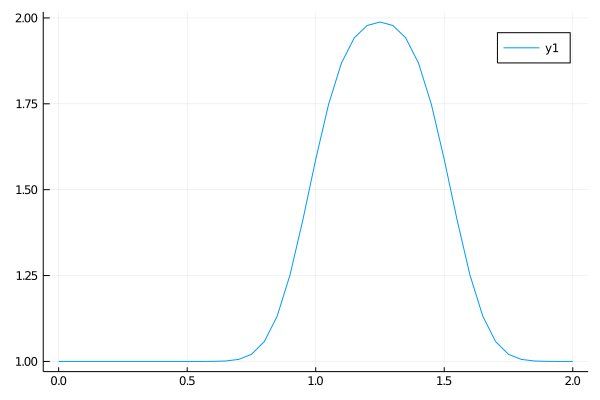

In [14]:
linearconv2(41)

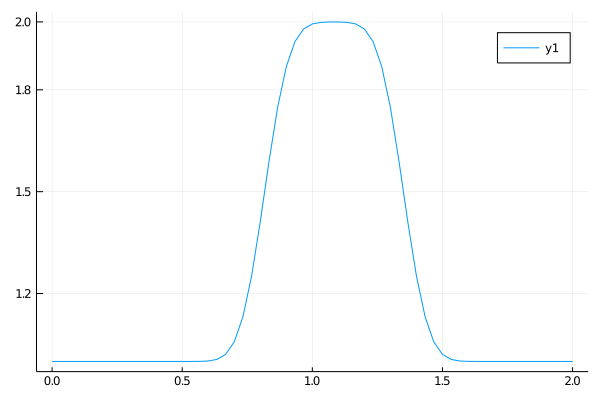

In [15]:
linearconv2(61)

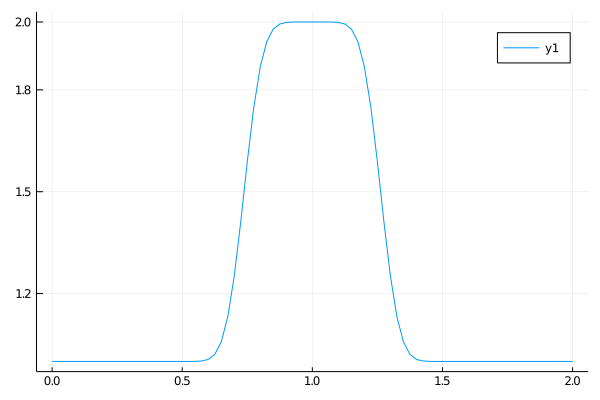

In [16]:
linearconv2(81)

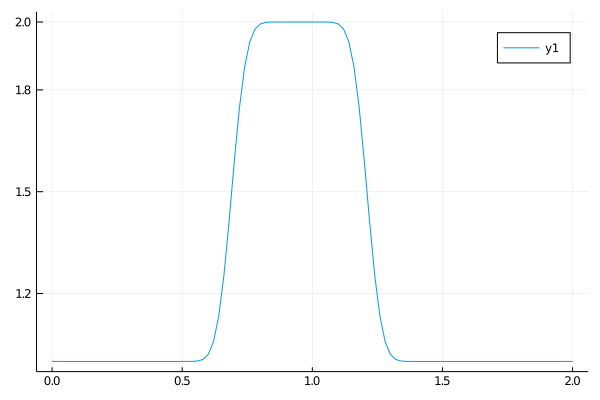

In [17]:
linearconv2(101)

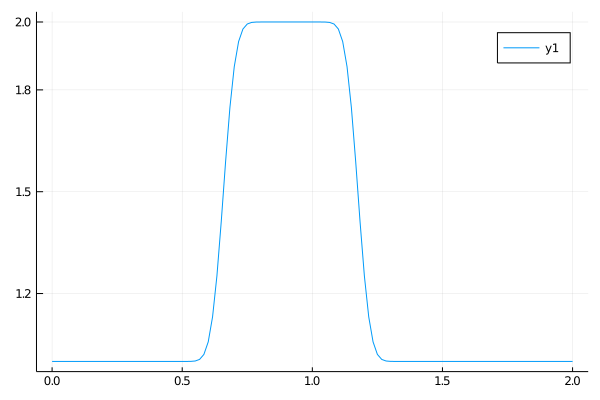

In [18]:
linearconv2(121)

Notice that as the number of points `nx` increases, the wave convects a shorter and shorter distance.  The number of time iterations we have advanced the solution at is held constant at `nt = 20`, but depending on the value of `nx` and the corresponding values of `dx` and `dt`, a shorter time window is being examined overall.  


It's possible to do rigurous analysis of the stability of numerical schemes, in some cases. Watch Prof. Barba's presentation of this topic in Video Lecture 9 on You Tube (https://youtube.com/watch?v=Yw1YPBupZxU).